# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Reading the dataset

In [2]:
df = pd.read_csv("third attempt.csv")

In [3]:
df['Sex'].value_counts(dropna = False)

1    5375
2    4624
Name: Sex, dtype: int64

In [4]:
numeric_cols = ['Customer relation', 'Income', 'Primary customer', 'New customer index', 'Age']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'Sex'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Customer relation', 'Income', 'Primary customer', 'New customer index', 'Age']
['Activity index', 'Customer seniority', 'Customer type', 'ID']


In [5]:
testing_dataset_train = pd.get_dummies(df, columns = ['Activity index', 'Customer seniority', 'Customer type'], drop_first = True)

In [6]:
random_seed = 4000
df_train, df_test = train_test_split(df, test_size = 0.32, random_state = random_seed, stratify = df['Sex']) 

In [7]:
print(df_train.shape)
print()
print(df_train['Sex'].value_counts(normalize = True))

(6799, 10)

1    0.537579
2    0.462421
Name: Sex, dtype: float64


In [8]:
print(df_test.shape)
print()
print(df_test['Sex'].value_counts(normalize = True))

(3200, 10)

1    0.5375
2    0.4625
Name: Sex, dtype: float64


In [9]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Sex']
    return X, y 

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [10]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [11]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

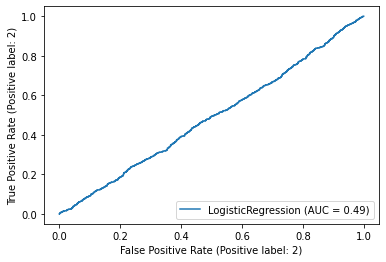

In [12]:
plot_roc_curve(clf, X_test, y_test)

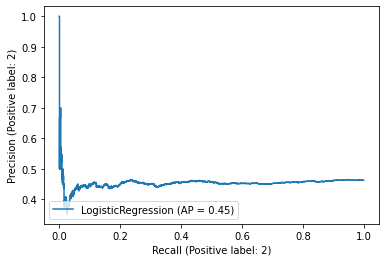

In [13]:
plot_precision_recall_curve(clf, X_test, y_test)

In [14]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [15]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold: ')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 Score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report ')
print(classification_report(y_test, test_pred))

Log loss = 0.69034
AUC = 0.48667
Average Precision = 0.54838

Using 0.5 as threshold: 
Accuracy = 0.53750
Precision = 0.53750
Recall = 1.00000
F1 Score = 0.69919

Classification Report 
              precision    recall  f1-score   support

           1       0.54      1.00      0.70      1720
           2       0.00      0.00      0.00      1480

    accuracy                           0.54      3200
   macro avg       0.27      0.50      0.35      3200
weighted avg       0.29      0.54      0.38      3200



C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion Matrix


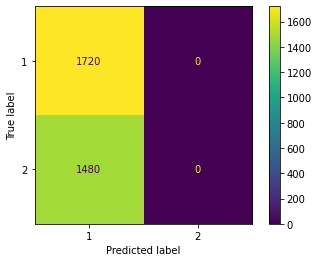

In [16]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [17]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-9.697398e-14
1,Activity index,-2.384842e-13
2,Customer seniority,-4.458235e-12
3,Customer type,-6.575675e-14
4,ID,-1.203115e-07
5,Customer relation,-2.315689e-13
6,Income,1.648279e-13
7,Primary customer,1.688517e-13
8,New customer index,-9.498697e-14
9,Age,3.706298e-13


In [18]:
pd.DataFrame(data = {'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,Customer relation,0.479060
1,Income,90613.040401
2,Primary customer,3.563767
3,New customer index,0.017149
4,Age,9.024335


In [19]:
aa = pd.DataFrame(data = {'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})
aa.to_csv('table04.csv')